In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\Asus\\Downloads")

In [3]:
df=pd.read_csv("Ecommerce Customers.csv")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In the "Ecommerce Customers" dataset, the main task is to use the given customer data to predict the "Yearly Amount Spent" by customers. This involves exploring relationships between features like "Time on Website," "Time on App," and "Length of Membership," and the target variable. Typically, a linear regression model is applied to identify patterns and make predictions based on these features. This exercise helps in understanding customer behavior and optimizing marketing strategies.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


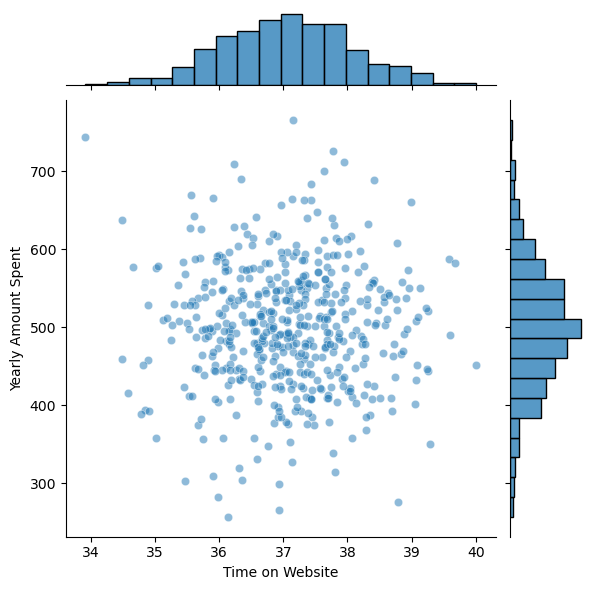

In [7]:
# EDA:-
sns.jointplot(x="Time on Website",y="Yearly Amount Spent", data=df, alpha=0.5)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


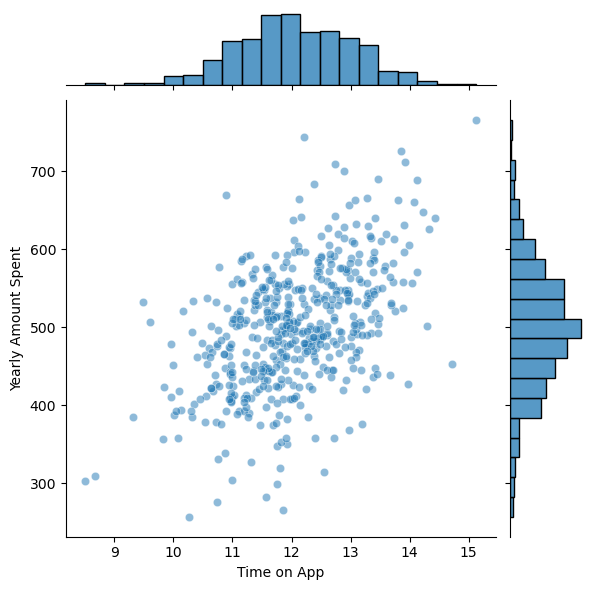

In [8]:
# EDA:-
sns.jointplot(x="Time on App",y="Yearly Amount Spent", data=df, alpha=0.5)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

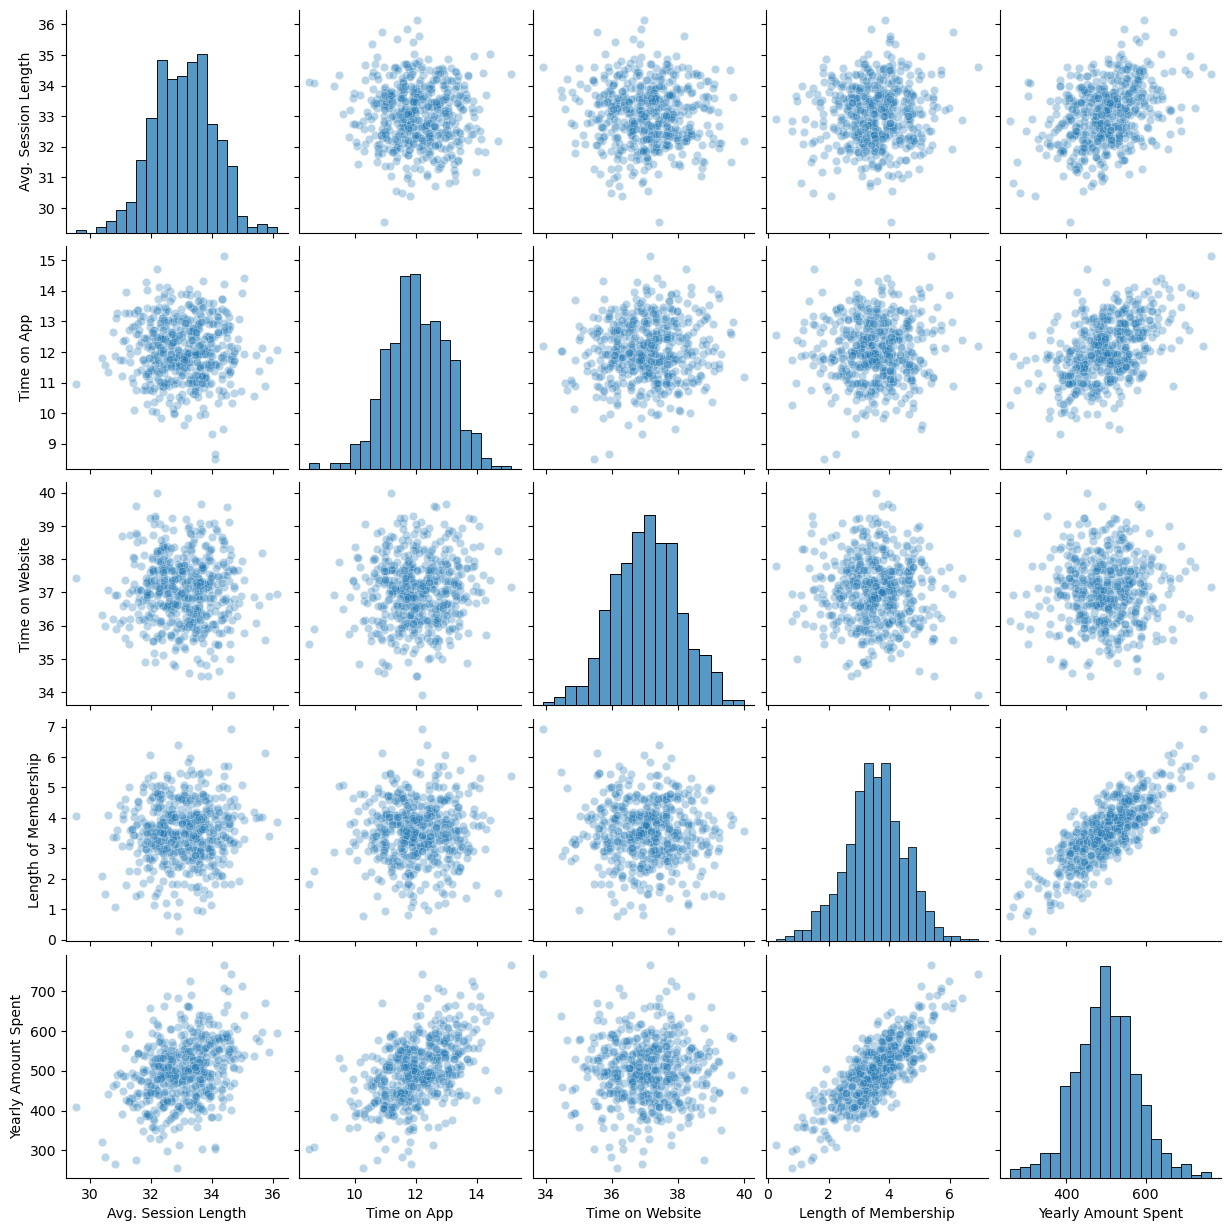

In [9]:
# EDA:-
sns.pairplot(data=df, kind="scatter", plot_kws={"alpha": 0.3})

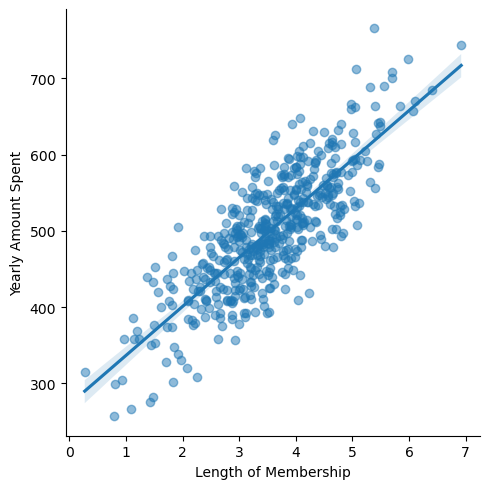

In [10]:
# linear model plot:- we will find least square difference
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df,scatter_kws={"alpha": 0.5})

In [11]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.intercept_

-1050.6536746645716

In [15]:
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [16]:
model.score(X_test,y_test)

0.9808757641125855

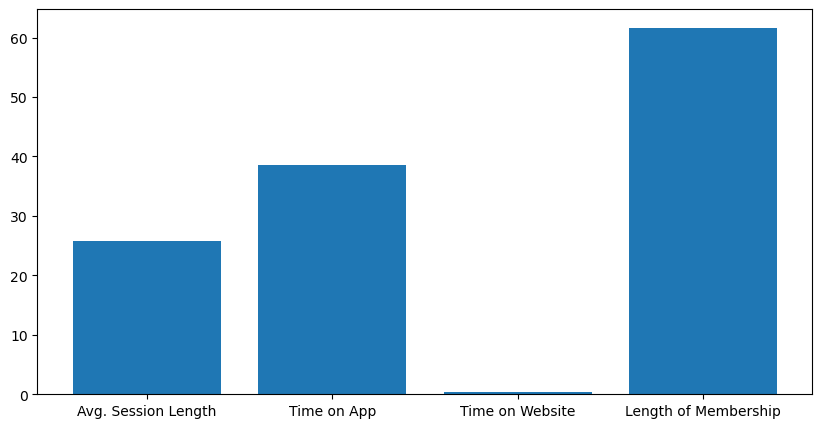

In [17]:
plt.figure(figsize=(10,5))
plt.bar(X.columns, model.coef_)
plt.show()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 8.42609164143213
Root Mean Squared Error (RMSE): 10.19389726086317
R-squared (R²) Score: 0.9808757641125855


C:\Users\Asus\AppData\Local\Temp\ipykernel_17676\275363764.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Actual Yearly Amount Spent","Predicted Yearly Amount Spent")


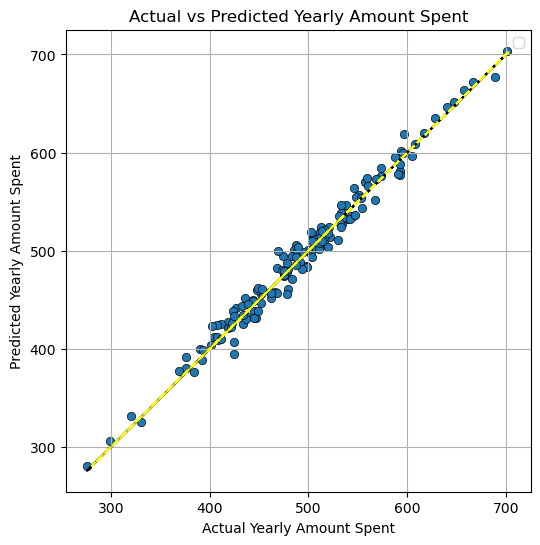

In [20]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, edgecolor='black')
plt.plot(y_test,y_test,color='black')
plt.plot(y_pred,y_pred,linestyle='dashed', color='yellow')
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted Yearly Amount Spent")
plt.grid(True)
plt.legend("Actual Yearly Amount Spent","Predicted Yearly Amount Spent")
plt.show()

In [21]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273
23,32.903251,11.657576,36.772604,3.919302
222,34.334865,11.109456,38.585855,3.892891
261,32.550527,13.041245,36.655208,3.456234


In [22]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
266    554.003093
23     519.340989
222    502.409785
261    514.009818
426    530.766719
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [23]:
model.predict([[31.425227,13.271475,37.239847,4.022103]]) # prediction with precision

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([535.13855756])

In [24]:
print('Model\'s performance:- ',model.score(X_test,y_test)*100,'%')

Model's performance:-  98.08757641125855 %


In [25]:
la=Lasso(alpha=0.1)

In [26]:
la.fit(X_train,y_train)

Lasso(alpha=0.1)

In [27]:
print('Model\'s Performance:-',la.score(X_test,y_test)*100,'%')

Model's Performance:- 98.08707811734435 %


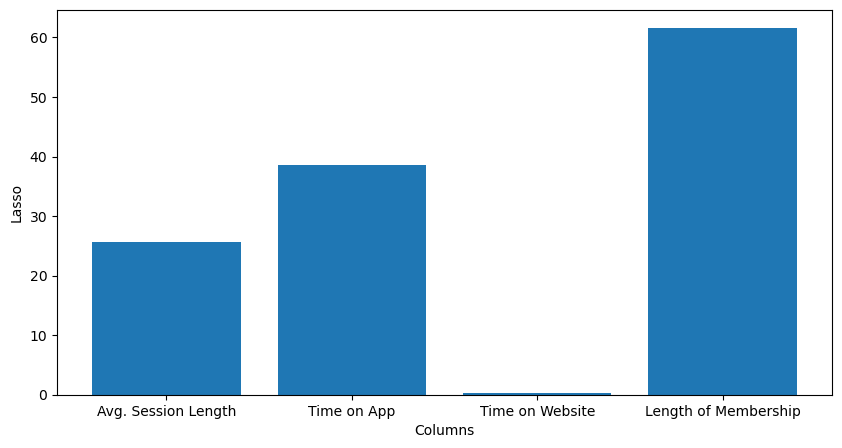

In [28]:
plt.figure(figsize=(10,5))
plt.bar(X.columns, la.coef_)
plt.xlabel('Columns')
plt.ylabel('Lasso')
plt.show()

In [29]:
mae = mean_absolute_error(y_test, la.predict(X_test))
mse = mean_squared_error(y_test, la.predict(X_test))
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 8.42247536782164
Root Mean Squared Error (RMSE): 10.195225216176647
R-squared (R²) Score: 0.9808757641125855


In [30]:
ri=Ridge(alpha=0.01)

In [31]:
ri.fit(X_train,y_train)

Ridge(alpha=0.01)

In [32]:
print('Model\'s Performance:-',ri.score(X_test,y_test)*100,'%')

Model's Performance:- 98.08757744125973 %


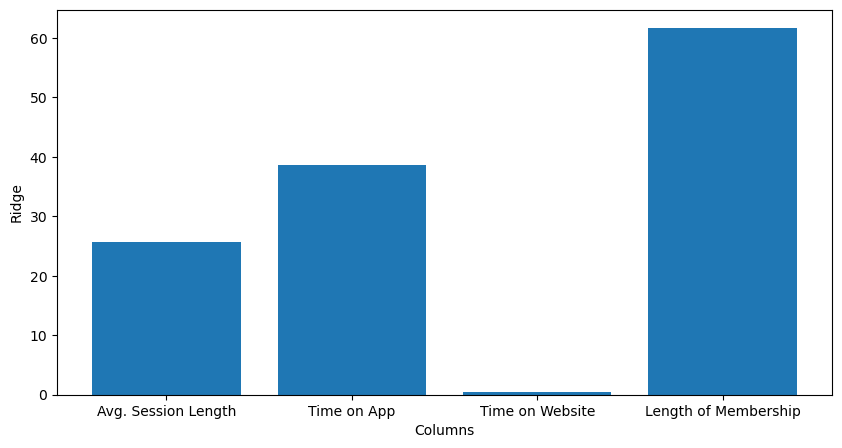

In [33]:
plt.figure(figsize=(10,5))
plt.bar(X.columns, ri.coef_)
plt.xlabel('Columns')
plt.ylabel('Ridge')
plt.show()

In [34]:
mae = mean_absolute_error(y_test, ri.predict(X_test))
mse = mean_squared_error(y_test, ri.predict(X_test))
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 8.426069268710313
Root Mean Squared Error (RMSE): 10.193894515726665
R-squared (R²) Score: 0.9808757641125855
